In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import math 
from ast import literal_eval
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp  /content/drive/MyDrive/Updated_Dateset_v5.zip /content/

In [4]:
!unzip  Updated_Dateset_v5.zip

Archive:  Updated_Dateset_v5.zip
  inflating: cdn_final_final.csv     
  inflating: cloud_final_final.csv   
  inflating: hosting_final_final.csv  
  inflating: proxy_final_final.csv   
  inflating: vpn_final_final.csv     


In [25]:
sample_size = 30000
df = pd.read_csv('cdn_final_final.csv')
#df['vendor']= ['cdn' for x in range(df.shape[0])]
df = df.sample(n = sample_size)
df1 = pd.read_csv('cloud_final_final.csv')
#df1['vendor']= ['cloud' for x in range(df1.shape[0])]
df1 = df1.sample(n = sample_size)
df2 = pd.read_csv('hosting_final_final.csv')
#df2['vendor']= ['hosting' for x in range(df2.shape[0])]
df2 = df2.sample(n = sample_size)
df3 = pd.read_csv('vpn_final_final.csv')
#df3['vendor']= ['vpn' for x in range(df3.shape[0])]
#df3 = df3.sample(n = 15000)
df4 = pd.read_csv('proxy_final_final.csv')
#df4 = df4.sample(n = 9200)

df = df.append([df1,df2,df3,df4],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [26]:
df['data.http.result.response.headers.server.0'].value_counts()

Apache                                                                    20493
CloudFront                                                                20413
awselb/2.0                                                                 8104
Varnish                                                                    5075
nginx                                                                      4730
                                                                          ...  
Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/7.2.30                          1
Apache/2.4.6 (Red Hat Enterprise Linux) OpenSSL/1.0.2k-fips PHP/5.4.40        1
Apache/2.4.48 (Win64) OpenSSL/1.1.1k PHP/7.4.21                               1
Apache/2.4.39 (Amazon) PHP/7.1.32                                             1
Apache/2.4.37 (Win32) OpenSSL/1.0.2p PHP/5.6.40                               1
Name: data.http.result.response.headers.server.0, Length: 1592, dtype: int64

In [27]:
df['data.http.result.response.headers.content_type.0'].count()

91896

In [28]:
df['data.http.result.response.headers.connection.0'].count()

64686

In [29]:
df.columns

Index(['ip', 'No Of Owners', 'CIDR', 'netType', 'Organization',
       'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server.0',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.unknown.0.key',
       'data.http.result.response.headers.unknown.0.value.0',
       'data.http.result.response.headers.connection.0',
       'data.http.result.response.headers.via.0',
       'data.http.result.response.headers.unknown.1.key',
       'data.http.result.response.headers.unknown.1.value.0',
       'data.http.result.response.headers.accept_ranges.0',
       'data.http.result.response.headers.cache_control.0',
       'data.http.result.response.headers.retry_after.0',
       'data.http.result.response.body',
       'data.http.result.response.body_sha256',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type.0',
       'data.http.result.response.headers.location.0',
   

In [30]:
renameDict = {
       'data.http.result.response.headers.server.0':'data.http.result.response.headers.server',
       'data.http.result.response.headers.connection.0':'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via.0':'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges.0': 'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control.0':'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after.0':'data.http.result.response.headers.retry_after',
       'data.http.result.response.headers.content_type.0':'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location.0': 'data.http.result.response.headers.location',
       'data.http.result.redirect_response_chain.0.status_line':'data.http.result.redirect_response_chain.status_line',
       'data.http.result.response.headers.etag.0':'data.http.result.response.headers.etag',
       'data.http.result.response.headers.last_modified.0':'data.http.result.response.headers.last_modified',
       'data.http.result.response.headers.vary.0':'data.http.result.response.headers.vary',
       'data.http.result.response.transfer_encoding.0': 'data.http.result.response.transfer_encoding',
       'data.http.result.response.headers.x_powered_by.0':'data.http.result.response.headers.x_powered_by',
       'data.http.result.response.headers.pragma.0':'data.http.result.response.headers.pragma',
       'data.http.result.redirect_response_chain.0.headers.server.0':'data.http.result.redirect_response_chain.headers.server'
}

In [31]:
df.rename(columns=renameDict, errors="raise",inplace=True)

In [32]:
catfields = [ 'netType', 
              #'Organization',
              'data.http.result.response.headers.server',
               'data.http.result.response.status_code',
              'data.http.result.response.headers.connection',
              'data.http.result.response.headers.via',
              'data.http.result.response.headers.accept_ranges',
              'data.http.result.response.headers.cache_control',
              'data.http.result.response.headers.retry_after',
             # 'data.http.result.response.body',
             # 'data.http.result.response.body_sha256',
              'data.http.result.response.headers.content_type',
              'data.http.result.response.headers.location',
             # 'data.http.result.redirect_response_chain.status_line',
              'data.http.result.response.headers.etag',
              #'data.http.result.response.headers.vary',
              #'data.http.result.response.transfer_encoding',
             # 'data.http.result.response.headers.x_powered_by',
              #'data.http.result.response.headers.pragma',
              'as_name', 'as_no',
              'data.tls.status',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization',
              'vendor'
       ]

In [33]:
def getgeneralCloudfront(x):
  if('(CloudFront)' in str(x)):
      return 'CloudFront'
  else:
      return x

def getgeneralServerNames(x):
  if('nginx' in str(x)):
      return 'nginx'
  elif('Apache' in str(x)):
      return 'Apache'
  else:
      return x

def getgeneralphp(x):
  if (pd.isna(x)):
    return -1
  else:
    if('PHP' in x):
      return 'PHP'

def changenullaszero(x):
  if (pd.isna(x)): 
    return -1
  else:
    return 1

def getCIDRBlockLength(ipadd):
   if(pd.isna(ipadd)):
     return 0
   else:
      if(len(ipadd.split(','))==1):
        return (2**(32-int(ipadd.split('/')[1])))
      else:
        sum=0
        for i in ipadd.split(','):
          sum=sum + (2**(32-int(i.split('/')[1])))
        return sum 

def arrayLiteral(stringarray):
  if(pd.isna(stringarray)):
     return 0
  return len(literal_eval(stringarray))

def removeSquareBrackets(text):
  if(pd.isna(text)):
     return -1
  return literal_eval(text)[0];

# def featureImportance(clf):
#   importance = clf.feature_importances_
#   importancelist = []
#   for i,v in enumerate(importance):
#     importancelist.append([df.columns[i],v])
#   importantdf = pd.DataFrame(importancelist)
#   importantdf.columns = ['Feature','Importance']
#   importantdf = importantdf.sort_values(by=['Importance'],ascending=False)
#   importantdf = importantdf[::-1]
#   print(importantdf)
#   fig = importantdf.plot.barh(x='Feature', y='Importance', rot=0,figsize=(5,10),title = 'Overall Feature Importance'
  #plt.savefig('Overall_Feature_Importance.png',bbox_inches='tight')

In [34]:
#df['data.http.result.response.headers.via']  = df["data.http.result.response.headers.via"].apply(getgeneralCloudfront)
df['data.http.result.response.status_code'].fillna(-1, inplace=True)
df['data.http.result.response.headers.pragma'].fillna(-1, inplace=True)
df['data.http.result.response.headers.connection'].fillna(-1, inplace=True)
df['data.http.result.response.headers.via']  = df["data.http.result.response.headers.via"].apply(changenullaszero)
df['data.http.result.response.headers.via'].fillna(-1, inplace=True)
df['data.http.result.response.headers.accept_ranges'].fillna(-1, inplace=True)
df['data.http.result.response.headers.cache_control'].fillna(-1, inplace=True)
df['data.http.result.response.headers.retry_after'].fillna(-1, inplace=True)
df['data.http.result.response.body']  = df["data.http.result.response.body"].apply(changenullaszero)
df['data.http.result.response.body_sha256']  = df['data.http.result.response.body_sha256'].apply(changenullaszero)
df['data.http.result.response.content_length'].fillna(0, inplace=True)
df['data.http.result.response.headers.content_type'].fillna(-1, inplace=True)
df['data.http.result.response.headers.location'] = df['data.http.result.response.headers.location'].apply(changenullaszero)
df['data.http.result.redirect_response_chain.status_line'].fillna(-1, inplace=True)
df['data.http.result.response.headers.etag'] = df['data.http.result.response.headers.etag'].apply(changenullaszero)
df['data.http.result.response.headers.last_modified']  = df['data.http.result.response.headers.last_modified'].apply(changenullaszero)
df['data.http.result.response.headers.vary'].fillna(-1, inplace=True)
df['data.http.result.response.transfer_encoding'].fillna(-1, inplace=True)
df['data.http.result.response.headers.x_powered_by']  = df['data.http.result.response.headers.x_powered_by'].apply(getgeneralphp)
#df['data.http.result.response.headers.x_powered_by'].fillna(-1, inplace=True)

df['data.http.result.response.headers.server']  = df['data.http.result.response.headers.server'].apply(getgeneralServerNames)
df['data.http.result.response.headers.server'].fillna(-1, inplace=True)

In [35]:
# df['data.http.result.response.headers.server'] = le.fit_transform(df['data.http.result.response.headers.server'].astype(str))
# df['data.http.result.response.status_code'] = le.fit_transform(df['data.http.result.response.status_code'].astype(str))
# df['data.http.result.response.headers.connection'] = le.fit_transform(df['data.http.result.response.headers.connection'].astype(str))
# df['data.http.result.response.headers.via'] = le.fit_transform(df['data.http.result.response.headers.via'].astype(str))
# df['data.http.result.response.headers.accept_ranges'] = le.fit_transform(df['data.http.result.response.headers.accept_ranges'].astype(str))
# df['data.http.result.response.headers.cache_control'] = le.fit_transform(df['data.http.result.response.headers.cache_control'].astype(str))
# df['data.http.result.response.headers.retry_after'] = le.fit_transform(df['data.http.result.response.headers.retry_after'].astype(str))
# df['data.http.result.response.body'] = le.fit_transform(df['data.http.result.response.body'].astype(str))
# df['data.http.result.response.body_sha256'] = le.fit_transform(df['data.http.result.response.body_sha256'].astype(str))
# df['data.http.result.response.headers.content_type'] = le.fit_transform(df['data.http.result.response.headers.content_type'].astype(str))

# df['data.http.result.response.headers.location'] = le.fit_transform(df['data.http.result.response.headers.location'].astype(str))
# df['data.http.result.redirect_response_chain.status_line'] = le.fit_transform(df['data.http.result.redirect_response_chain.status_line'].astype(str))
# df['data.http.result.response.headers.etag'] = le.fit_transform(df['data.http.result.response.headers.etag'].astype(str))
# df['data.http.result.response.headers.last_modified'] = le.fit_transform(df['data.http.result.response.headers.last_modified'].astype(str))
# df['data.http.result.response.headers.vary'] = le.fit_transform(df['data.http.result.response.headers.vary'].astype(str))
# df['data.http.result.response.transfer_encoding'] = le.fit_transform(df['data.http.result.response.transfer_encoding'].astype(str))

# df['data.http.result.response.headers.x_powered_by'] = le.fit_transform(df['data.http.result.response.headers.x_powered_by'].astype(str))
# df['data.http.result.response.headers.pragma'] = le.fit_transform(df['data.http.result.response.headers.pragma'].astype(str))
# df['as_name'] = le.fit_transform(df['as_name'].astype(str))

# df['as_no'] = le.fit_transform(df['as_no'].astype(str))
# df['vendor'] = le.fit_transform(df['vendor'].astype(str))
# vendorEncodings = le.classes_

In [36]:
#df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(changenullaszero)

In [37]:
df['netSize']  = df["CIDR"].apply(getCIDRBlockLength)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].apply(removeSquareBrackets)
df['SAN Count']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'].apply(arrayLiteral)

In [38]:
df['Organization'].fillna(-1, inplace=True)
df['netType'].fillna(-1, inplace=True)
df['No of Who is Records'].fillna(0, inplace=True)
df['Most Recent Update'].fillna(0, inplace=True)

In [39]:
# df['Organization'] = le.fit_transform(df['Organization'].astype(str))
# df['netType'] = le.fit_transform(df['netType'].astype(str))

# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].astype(str))
# df['data.tls.status'] = le.fit_transform(df['data.tls.status'].astype(str))

In [40]:
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'],axis=1)
df = df.drop(['No Of Owners'],axis=1)
df = df.drop(['CIDR'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.value.0'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.value.0'],axis=1)
df = df.drop(['ip'],axis=1)
df = df.drop(['Unnamed: 0_y'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'],axis=1)


#Reducing the Insignificant Features
df = df.drop(['data.http.result.response.transfer_encoding'],axis=1)
df = df.drop(['data.http.result.response.headers.x_powered_by'],axis=1)
df = df.drop(['data.http.result.response.headers.pragma'],axis=1)
df = df.drop(['data.http.result.redirect_response_chain.headers.server'],axis=1)
df = df.drop(['data.http.result.redirect_response_chain.status_line'],axis=1)
df = df.drop(['data.http.result.response.headers.last_modified'],axis=1)
df = df.drop(['data.http.result.response.body_sha256'],axis=1)
df = df.drop(['data.http.result.response.headers.vary'],axis=1)
df = df.drop(['data.http.result.response.body'],axis=1)

df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'],axis=1)

#Unsure Significant Features
df = df.drop(['Organization'],axis=1)

In [41]:
categoricalDf = df[catfields]
df.drop(catfields, axis=1, inplace=True)
df

,Most Recent Update,No of Who is Records,data.http.result.response.content_length,netSize,SAN Count
0,1.585613e+09,5.0,915.0,262144,0
1,0.000000e+00,0.0,915.0,0,0
2,0.000000e+00,0.0,0.0,0,0
3,1.632096e+09,1.0,0.0,65536,31
4,0.000000e+00,0.0,915.0,0,18
...,...,...,...,...,...
121048,1.472602e+09,1.0,0.0,16,0
121049,1.488331e+09,2.0,0.0,16777216,0
121050,1.521072e+09,1.0,0.0,16777216,0
121051,1.363599e+09,2.0,0.0,16777216,0


In [42]:
from sklearn.preprocessing import LabelEncoder
import collections
#df = df.astype(str).apply(LabelEncoder().fit_transform)

In [43]:
encoder_dict = collections.defaultdict(LabelEncoder)
categoricalDfEncoded = categoricalDf.astype(str).apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [44]:
categoricalDfEncoded

,netType,data.http.result.response.headers.server,data.http.result.response.status_code,data.http.result.response.headers.connection,data.http.result.response.headers.via,data.http.result.response.headers.accept_ranges,data.http.result.response.headers.cache_control,data.http.result.response.headers.retry_after,data.http.result.response.headers.content_type,data.http.result.response.headers.location,data.http.result.response.headers.etag,as_name,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,vendor
0,11,64,14,7,1,0,0,0,43,0,0,92,569,3,1,4,2,11,0
1,0,64,14,7,1,0,0,0,43,0,0,92,569,3,1,4,2,11,0
2,0,1,0,0,0,0,0,0,2,0,0,92,569,3,1,4,2,11,0
3,6,1,0,0,0,0,0,0,2,0,0,996,2483,2,10,281,2,11,0
4,0,64,14,7,1,0,0,0,43,0,0,92,569,2,72,52,2,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121048,12,1,0,0,0,0,0,0,2,0,0,667,2785,0,1,4,2,11,3
121049,1,1,0,0,0,0,0,0,2,0,0,471,310,0,1,4,2,11,3
121050,3,1,0,0,0,0,0,0,2,0,0,713,1498,0,1,4,2,11,3
121051,1,1,0,0,0,0,0,0,2,0,0,2224,2148,0,1,4,2,11,3


In [45]:
df[catfields] = categoricalDfEncoded

In [46]:
renameDict = {
       'data.http.result.response.headers.via':'Via',
       'data.http.result.response.content_length': 'Content_Length',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization':'Certificate_Issuer_Org',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country':'Certificate_Issuer_Country',
       'data.http.result.response.status_code':'Status_Code',
       'data.http.result.response.headers.server': 'Server',
       'data.http.result.response.headers.connection':'Connection',
       'data.http.result.response.headers.content_type':'Content_Type',
       'data.http.result.response.headers.cache_control':'Cache_control',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality':'X.509_Subject_Locality',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization':'X.509_Subject _Org',
       'data.http.result.response.headers.accept_ranges':'Accept_Ranges',
       'data.http.result.response.headers.retry_after':'Retry_After',
       'data.http.result.response.headers.location':'Location'
}

In [47]:
df.rename(columns=renameDict, errors="raise",inplace=True)

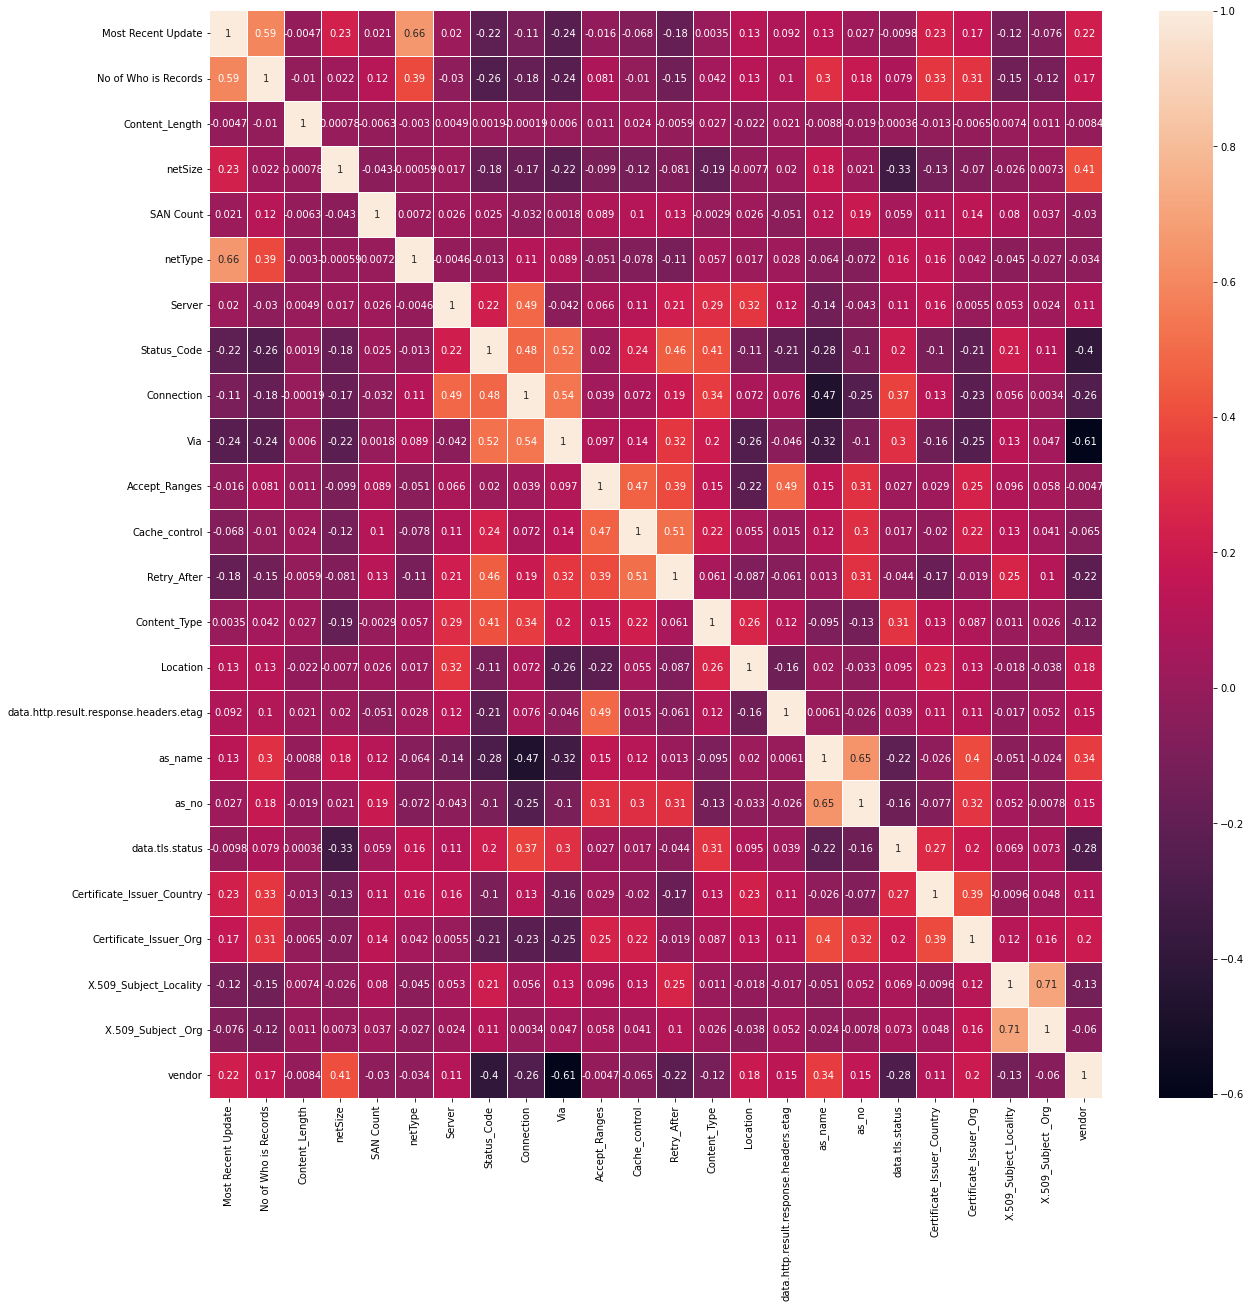

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor,annot=True,linewidths=.005)
plt.show()